# Hands-on

#### Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
# demais pacotes serão importados, mas vamos adicioná-los à medida que houver necessidade 

#### Adquirindo os dados

Vamos fazer a leitura de nossos dados utilizando Pandas

In [2]:
data = pd.read_csv('forestfires.csv',sep=';')

# Imprimindo as primeiras 5 linhas
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,NaN,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,NaN,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,NaN,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
# podemos usar o método info() que é útil para obter uma rápida descrição dos dados, em particular o número de linhas, o tipo de cada 
# atributo e o número de valores não nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     491 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [4]:
data['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [5]:
# O método describe() apresenta um resumo dos atributos numéricos
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,491.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.929328,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.853661,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.550000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


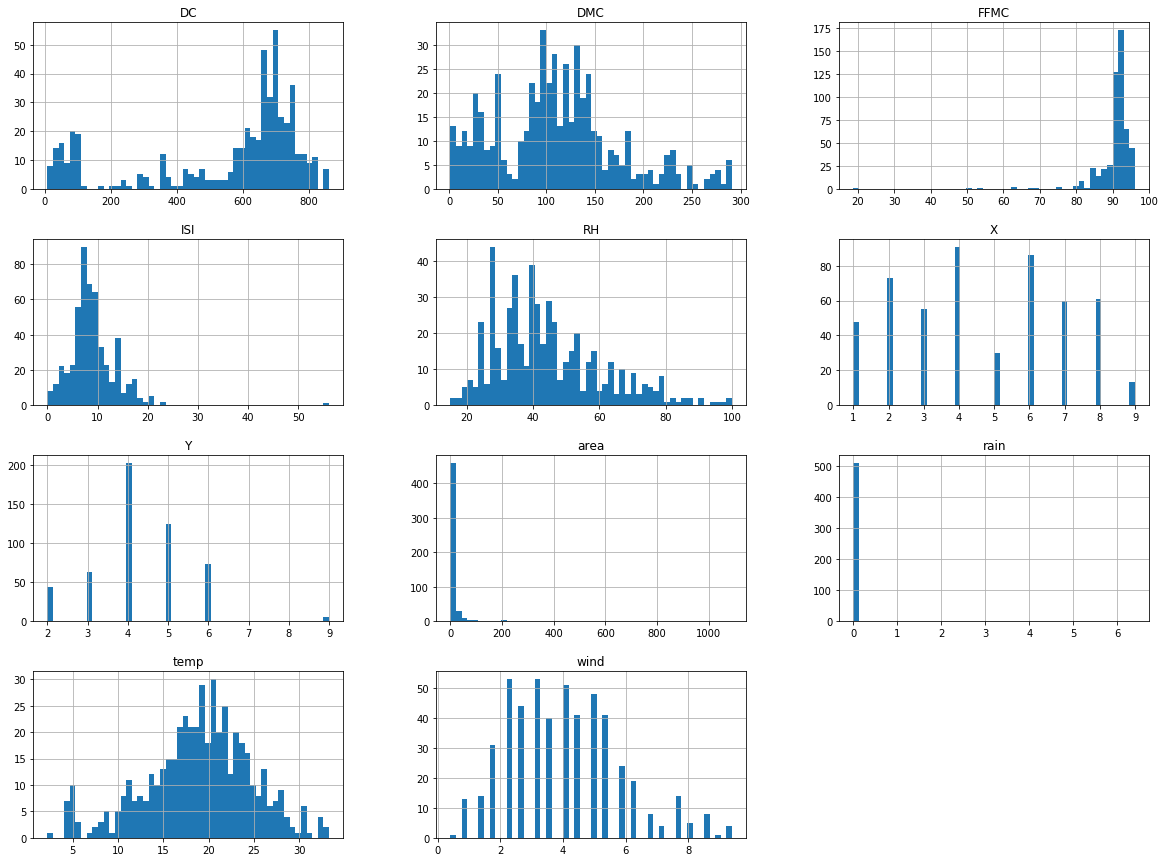

In [6]:
# Função de apoio
# Não se preocupe se não entender como funciona o plot de gráficos agora. Vamos estudar isso em detalhes na próxima aula
# deixei aqui apenas para detalhar um pouco mais nosso trabalho

import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

### Correlação

Podemos calcular o coeficiente de correlação padrão (Correlação de Pearson)entre cada par de atributos usando o método corr(). Vamos ver o quanto cada atributo se relaciona com area (aquilo que estamos tentando predizer)

In [7]:
corr_matrix = data.corr()
corr_matrix["area"].sort_values(ascending=False)

area    1.000000
temp    0.093109
DMC     0.072994
X       0.063385
DC      0.049383
Y       0.044873
FFMC    0.040122
wind    0.012317
ISI     0.008258
rain   -0.007366
RH     -0.075519
Name: area, dtype: float64

## Preparando os Dados para Algoritmos de Machine Learning

In [8]:
features = data.drop('area', axis=1)
labels = data['area'].copy()

### Limpeza dos Dados

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     491 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [10]:
# data.dropna(subset=["temp"]) # opção 1
# data.drop("temp", axis=1) # opção 2
# median = data["temp"].median()
# data["temp"].fillna(median) # opção 3

# lembrando que se a opção 3 for escolhida, precisamos tratar os dados tanto no conjunto de treino quanto no conjunto de teste

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [14]:
data_num = data.drop(['month','day'],axis=1)

In [15]:
# Agora precisamos ajustar a instância do Imputer aos dados de treinamento usando o método fit():
imputer.fit(data_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [16]:
imputer.statistics_

array([4.000e+00, 4.000e+00, 9.160e+01, 1.083e+02, 6.642e+02, 8.400e+00,
       1.930e+01, 4.200e+01, 4.000e+00, 0.000e+00, 5.200e-01])

In [17]:
X = imputer.transform(data_num) # o resultado é um numpy.array. Precisamos converter para DataFrame
data_transformed = pd.DataFrame(X, columns=data_num.columns)
data_transformed.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7.0,5.0,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0
1,7.0,4.0,90.6,35.4,669.1,6.7,19.3,33.0,0.9,0.0,0.0
2,7.0,4.0,90.6,43.7,686.9,6.7,19.3,33.0,1.3,0.0,0.0
3,8.0,6.0,91.7,33.3,77.5,9.0,19.3,97.0,4.0,0.2,0.0
4,8.0,6.0,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.0


In [18]:
# podemos confirmar que os valores faltantes foram todos preenchidos
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 11 columns):
X       517 non-null float64
Y       517 non-null float64
FFMC    517 non-null float64
DMC     517 non-null float64
DC      517 non-null float64
ISI     517 non-null float64
temp    517 non-null float64
RH      517 non-null float64
wind    517 non-null float64
rain    517 non-null float64
area    517 non-null float64
dtypes: float64(11)
memory usage: 44.6 KB


### Manipulando Atributos Textuais e Categóricos

In [19]:
# separando apenas atributos categóricos
data_cat = data[['month','day']]

In [20]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
data_cat_1hot = encoder.fit_transform(data_cat)
data_cat_1hot

array([[ 7.,  0.],
       [10.,  5.],
       [10.,  2.],
       ...,
       [ 1.,  3.],
       [ 1.,  2.],
       [ 9.,  5.]])

### Pipelines de Transformação

In [22]:
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(missing_values=np.nan, strategy='median')),
])
data_num_tr = num_pipeline.fit_transform(data_num)

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

A classe DataFrameSelector irá separar o dataframe de acordo com o conteúdo da variável attribute_names, retornando apenas aquelas que são categórias ou aquelas que são numéricas. Essa classe herda os métodos BaseEstimator e TransformerMixin.

O primeiro é responsável por implementar os métodos get_params() e set_params() que são extremamente úteis quando vamos executar um gridsearch, por exemplo. Com essa classe podemos acessar os valores que estão definidos dentro do método __init__, bem como atribuir novos valores apra ele. 

Já TransformerMixin tras implementado o método fit_transform(), que nada mais é do que aplicar o método fit() e, logo em seguida, o método transform.

Esse link pode ajudar a esclarecer melhor as coisas, caso ainda tenham dúvidas: [link](https://github.com/ageron/handson-ml/issues/391)

In [24]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import OrdinalEncoder #skl 0.20>
num_attribs = list(data_num)
cat_attribs = ['month','day']
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
])
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('categorial_encoder', OrdinalEncoder())
    ])
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

In [25]:
data_prepared = full_pipeline.fit_transform(data) #retorna um numpy.array

In [26]:
# Agora temos nossos dados preparados.
data_prepared[0:5,:]

array([[7.00000000e+00, 5.00000000e+00, 8.62000000e+01, 2.62000000e+01,
        9.43000000e+01, 5.10000000e+00, 8.20000000e+00, 5.10000000e+01,
        6.70000000e+00, 0.00000000e+00, 0.00000000e+00, 7.00000000e+00,
        0.00000000e+00],
       [7.00000000e+00, 4.00000000e+00, 9.06000000e+01, 3.54000000e+01,
        6.69100000e+02, 6.70000000e+00, 1.89293279e+01, 3.30000000e+01,
        9.00000000e-01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+01,
        5.00000000e+00],
       [7.00000000e+00, 4.00000000e+00, 9.06000000e+01, 4.37000000e+01,
        6.86900000e+02, 6.70000000e+00, 1.89293279e+01, 3.30000000e+01,
        1.30000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+01,
        2.00000000e+00],
       [8.00000000e+00, 6.00000000e+00, 9.17000000e+01, 3.33000000e+01,
        7.75000000e+01, 9.00000000e+00, 1.89293279e+01, 9.70000000e+01,
        4.00000000e+00, 2.00000000e-01, 0.00000000e+00, 7.00000000e+00,
        0.00000000e+00],
       [8.00000000e+00, 6.00000000e+